<a href="https://colab.research.google.com/github/DaylaHoang/London-Bikes/blob/main/LondonBikeRides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import zipfile #use this to extract the file downloaded from Kaggle
import kaggle #use this to download the dataset programatically from Kaggle

In [6]:
import os
os.environ['KAGGLE_USERNAME'] = "vuminhhoang"
os.environ['KAGGLE_KEY'] = "a7ace67ae0e531c49a947529bfd0f23b"

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
# download dataset from kaggle using the Kaggle API
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 64.5MB/s]


In [9]:
# extract the file from the downloaded zip file
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
  file.extractall()

In [10]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

In [11]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
bikes.shape

(17414, 10)

In [14]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

,count
weather_code,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


In [15]:
bikes.season.value_counts()

,count
season,
0.0,4394
1.0,4387
3.0,4330
2.0,4303


In [16]:
# specifying more the more understandable column names
new_cols_dict = {
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temp_real_C',
    't2':'temp_feels_like_C',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [17]:
# changing the humidity to values to percentage (values between 0 and 1)
bikes.humidity_percent = bikes.humidity_percent / 100

In [18]:
# creating a season dictionary
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [19]:
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [20]:
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')

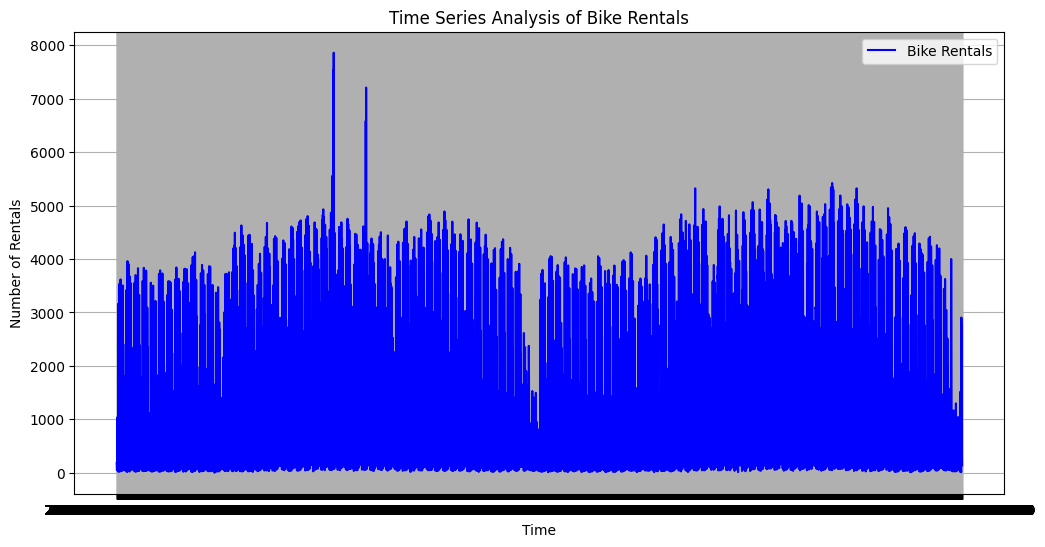

In [27]:
# Key Metrics Analysis: Time Series Plot of Bike Rentals
plt.figure(figsize=(12, 6))
plt.plot(bikes['time'], bikes['count'], label='Bike Rentals', color='blue')
plt.title('Time Series Analysis of Bike Rentals')
plt.xlabel('Time')
plt.ylabel('Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()

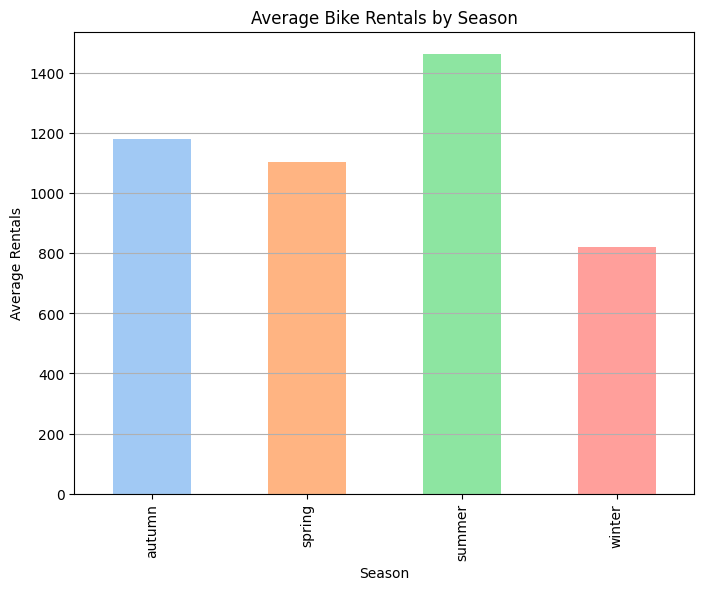

In [22]:
# Average Bike Rentals by Season
import matplotlib.pyplot as plt
import seaborn as sns

season_avg = bikes.groupby('season')['count'].mean()
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel')

season_avg.plot(kind='bar', color=colors)

plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.grid(axis='y')
plt.show()

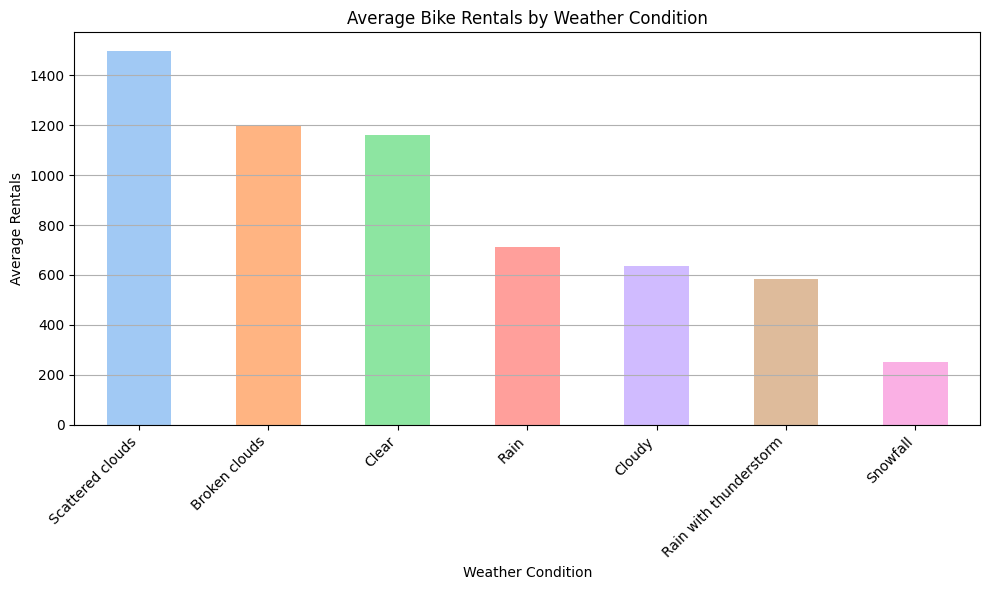

In [32]:
# Average Bike Rentals by Weather Condition
weather_avg = bikes.groupby('weather')['count'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

colors = sns.color_palette('pastel', n_colors=len(weather_avg))

weather_avg.plot(kind='bar', color=colors)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from

<ipython-input-31-de50be4dca29>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = bikes.groupby('temp_bin')['count'].mean()


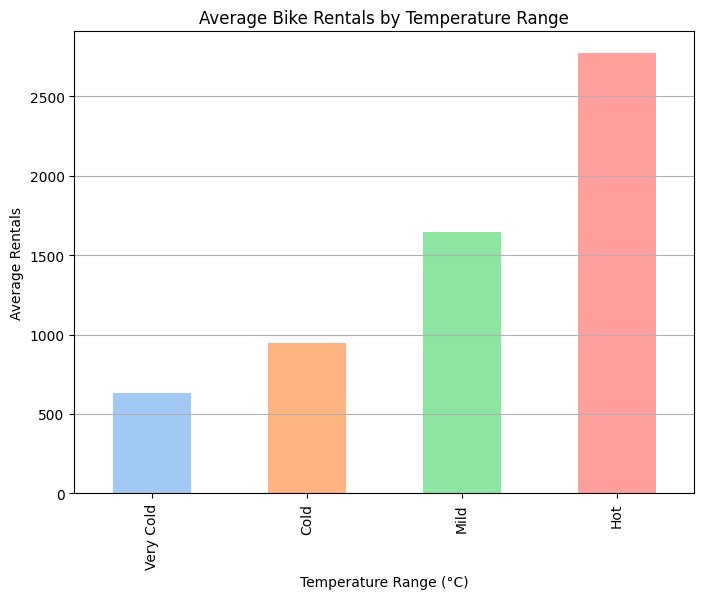

In [31]:
# Assuming 'bikes' is your DataFrame, replacing 'df_cleaned' with 'bikes'
bikes['temp_bin'] = pd.cut(bikes['temp_real_C'], bins=[-5, 5, 15, 25, 35], labels=['Very Cold', 'Cold', 'Mild', 'Hot'])
temp_avg = bikes.groupby('temp_bin')['count'].mean()
plt.figure(figsize=(8, 6))

# Get pastel colors from Seaborn's palette
colors = sns.color_palette('pastel', n_colors=len(temp_avg))

temp_avg.plot(kind='bar', color=colors)  # Apply pastel colors to the bars
plt.title('Average Bike Rentals by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Rentals')
plt.grid(axis='y')
plt.show()

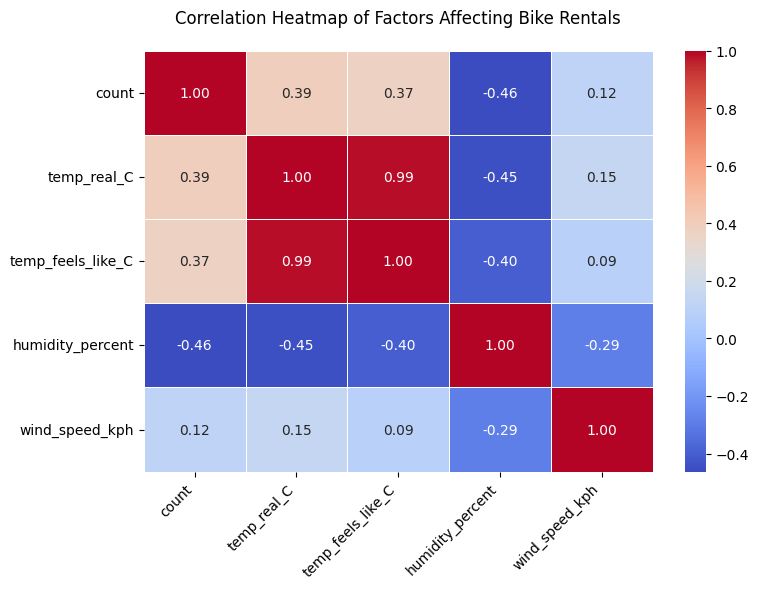

In [34]:
# Identify Top Factors Affecting Bike Rentals using Correlation
correlation = bikes[['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']].corr()
plt.figure(figsize=(8, 6))

# Using Seaborn's heatmap for better visualization and annotation
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Factors Affecting Bike Rentals', pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()